In [1]:
import pandas as pd
%matplotlib inline

In [2]:
from pathlib import Path
csvpath = Path('../Resources/oil_futures_front.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2014-02-18,100.51,100.51,100.51,100.51,0.96,100.51,25.0,12833.0
2014-02-19,100.83,100.83,100.83,100.83,0.32,100.83,0.0,12833.0
2014-02-20,100.78,100.78,100.78,100.78,0.05,100.78,15.0,12833.0
2014-02-21,100.61,100.61,100.61,100.61,0.17,100.61,0.0,12833.0
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0


<AxesSubplot:xlabel='Date'>

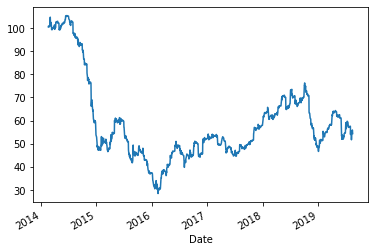

In [3]:
df.Settle.plot()

<AxesSubplot:xlabel='Date'>

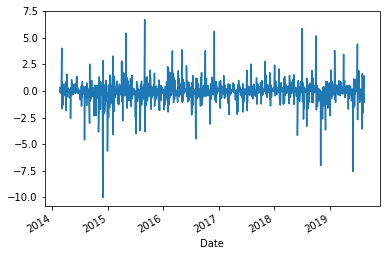

In [4]:
# Differencing the Settle price stationarizes the time series
df.Settle.diff().plot()

# Autocorrelation and Partial Autocorrelation Analysis

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

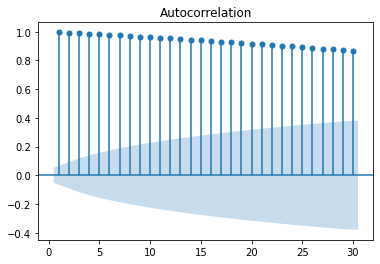

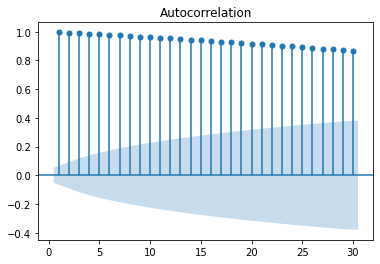

In [6]:
# Plot the autocorrelation of the Settle Prices
plot_acf(df.Settle, lags=30, zero=False)
 

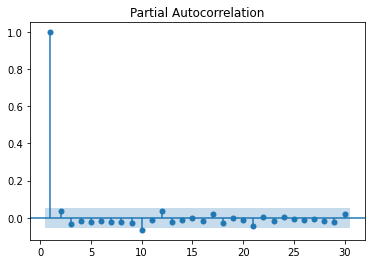

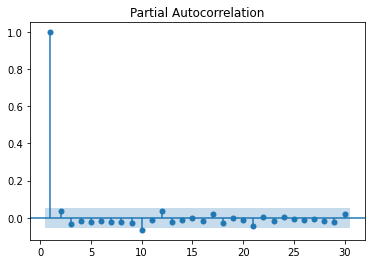

In [7]:
# Plot the partial autocorrelation of the returns
plot_pacf(df.Settle, lags=30, zero=False)
 

# ARIMA Model

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
# Create an ARIMA model
model = ARIMA(df.Settle.values, order=(1,1,1))
results=model.fit()
results.summary()
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1380
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1945.880
Method:                       css-mle   S.D. of innovations              0.991
Date:                Wed, 30 Sep 2020   AIC                           3899.760
Time:                        12:27:41   BIC                           3920.680
Sample:                             1   HQIC                          3907.586
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0334      0.025     -1.328      0.184      -0.083       0.016
ar.L1.D.y     -0.4478      0.205     -2.186      0.029      -0.849      -0.046
ma.L1.D.y      0.3661      0.213      1.721      0.085      -0.051       0.783
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.2332           +0.0000j            2.2332            0.5000
MA.1           -2.7312           +0.0000j            2.7312            0.5000
-----------------------------------------------------------------------------
"""

In [10]:
# Fit the model to the data
 

In [11]:
# Print the model summary
 

<AxesSubplot:title={'center':'Oil Futures Forecast'}>

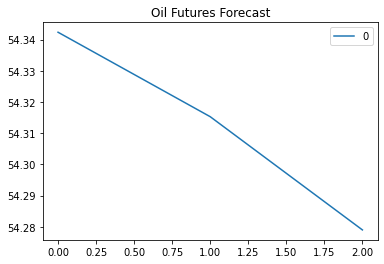

In [12]:
# Plot the Futures Price Forecast
pd.DataFrame(results.forecast(steps=3)[0]).plot(title="Oil Futures Forecast")
 

In [13]:
model = ARIMA(df.Settle.values, order=(2,1,1))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1380
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1939.200
Method:                       css-mle   S.D. of innovations              0.986
Date:                Wed, 30 Sep 2020   AIC                           3888.401
Time:                        12:27:43   BIC                           3914.550
Sample:                             1   HQIC                          3898.183
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0334      0.041     -0.821      0.412      -0.113       0.046
ar.L1.D.y      0.8282      0.046     18.193      0.000       0.739       0.917
ar.L2.D.y      0.1168      0.027      4.270      0.000       0.063       0.170
ma.L1.D.y     -0.9154      0.038    -24.075      0.000      -0.990      -0.841
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0514           +0.0000j            1.0514            0.0000
AR.2           -8.1406           +0.0000j            8.1406            0.5000
MA.1            1.0924           +0.0000j            1.0924            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Oil Futures Forecast'}>

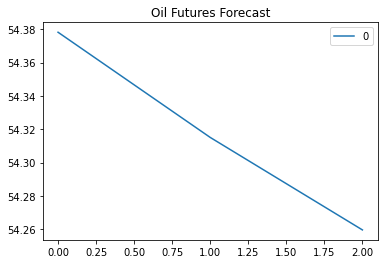

In [14]:
pd.DataFrame(results.forecast(steps=3)[0]).plot(title="Oil Futures Forecast")